#### **Geodynamics**


#### **References**
**Great software**: I2VIS,I3VIS,Underword,Aspect, and so on. <br>
**Book**<br>
Introduction to Numerical Geodynamic Modelling<br>
Pythonic Geodynamics<br>


In [1]:
# Cell-Particles Projections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LitModOutputName='post_processing_output.dat';
LitMod=np.loadtxt(LitModOutputName);

def main():
    a = 12
    print(a)

def m2py():
    a = 10
    print(a)
    
def f(x):
    y = np.random.rand(abs(x+1))
    plt.plot(y,'*')
    print(x)
    
if __name__ == '__main__':
    main()
    

12


In [2]:
main()

12


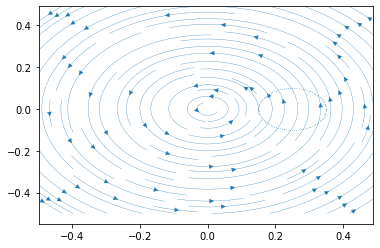

In [3]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
nxp=101; nxc=nxp-1; nyp=101; nyc=nyp-1
xTot=1.0; dx=xTot/nxc; xMin=-xTot/2.0; xMax=xTot/2.0
yTot=1.0; dy=yTot/nyc; yMin=-yTot/2.0; yMax=yTot/2.0

# allocate the lattice arrays
X = np.arange(nxp, dtype=float)*dx+xMin
Y = np.arange(nyp, dtype=float)*dy+yMin
vx = np.zeros((nxp,nyp), float)
vy = np.zeros((nxp,nyp), float)
# x lattice coordinates
# y lattice coordinates
# x-velocity at nodes
# y-velocity at nodes
# initialize the velocity field
for iy in np.arange(0,nyp): vx[:,iy] = -Y[iy]
for ix in np.arange(0,nxp): vy[ix,:] = X[ix]

pN=100
px=np.zeros(pN, float)
py=np.zeros(pN, float)
vxt=np.zeros(pN, float)
vyt=np.zeros(pN, float)

# initialize particle position
centerX=(xMin+xMax)/2.0+xTot*1./4.
centerY=(yMin+yMax)/2.0
radiusCircle=0.1*xTot
dTheta=2*np.pi / pN
for iTheta in np.arange(pN):
    theta=iTheta * dTheta
    px[iTheta]=centerX+np.sin(theta)*radiusCircle
    py[iTheta]=centerY+np.cos(theta)*radiusCircle

plt.streamplot( X[0:nxc], Y[0:nyc], vx[0:nxc,0:nyc].transpose(),vy[0:nxc,0:nyc].transpose(), linewidth=.3)
plt.scatter(px, py, s=.02, alpha=1.0)
plt.show()

cIX=np.zeros(pN, int)
cIY=np.zeros(pN, int)
w1=np.zeros(pN, float)
w2=np.zeros(pN, float)
w3=np.zeros(pN, float)
w4=np.zeros(pN, float)

steps=1000
totalTime=2*np.pi
plotEverySteps=20
deltaTime=totalTime/steps

from numpy.linalg import norm
def calculateWeightsInverse(xt,yt,X,Y,cIX,cIY,w1,w2,w3,w4,pN):
    # pN is the number of particles
    w1[0:pN] = 1/norm(np.array([xt[0:pN]-X[cIX[0:pN]], yt[0:pN]-Y[cIY[0:pN]]]))
    w2[0:pN] = 1/norm(np.array([xt[0:pN]-X[cIX[0:pN]+1], yt[0:pN]-Y[cIY[0:pN]]]))
    w3[0:pN] = 1/norm(np.array([xt[0:pN]-X[cIX[0:pN]], yt[0:pN]-Y[cIY[0:pN]+1]]))
    w4[0:pN] = 1/norm(np.array([xt[0:pN]-X[cIX[0:pN]+1], yt[0:pN]-Y[cIY[0:pN]+1]]))
    return(w1,w2,w3,w4)

def calculateWeightsBilinear(xt,yt,X,Y,cIX,cIY,w1,w2,w3,w4,pN,dx,dy):
    w1[0:pN]=(1-(np.abs(xt[0:pN] -X[cIX[0:pN]])/dx))*(1-(np.abs(yt[0:pN], -Y[cIY[0:pN]])/dy))
    w2[0:pN]=(1-(np.abs(xt[0:pN] -X[cIX[0:pN]+1])/dx))*(1-(np.abs(yt[0:pN], -Y[cIY[0:pN]])/dy))
    w3[0:pN]=(1-(np.abs(xt[0:pN] -X[cIX[0:pN]])/dx))*(1-(np.abs(yt[0:pN], -Y[cIY[0:pN]+1])/dy))
    w4[0:pN]=(1-(np.abs(xt[0:pN] -X[cIX[0:pN]+1])/dx))*(1-(np.abs(yt[0:pN], -Y[cIY[0:pN]+1])/dy))
    return (w1,w2,w3,w4)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from main import *

/home/ictja/Software/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


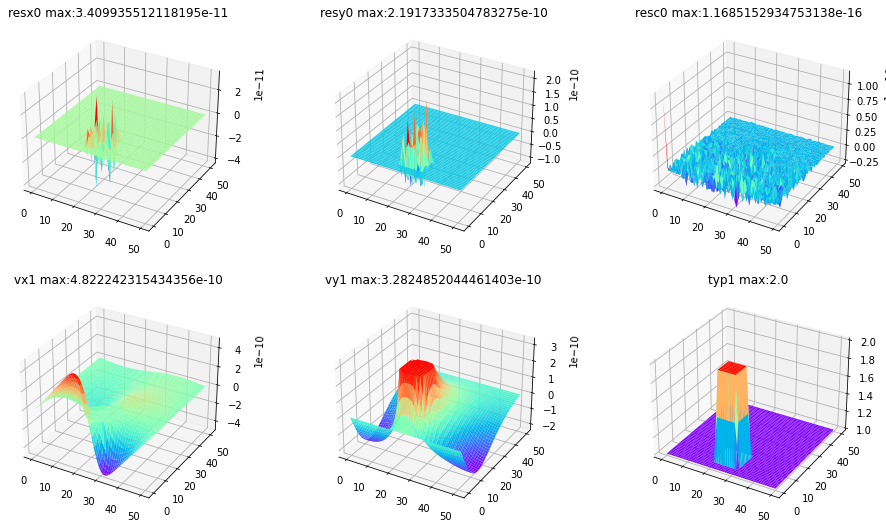

In [22]:
# %matplotlib ipympl

def surf(data):
    ax = Axes3D(plt.figure())
    X = np.arange(data.shape[1])
    Y = np.arange(data.shape[0])
    X, Y = np.meshgrid(X, Y)
    ax.plot_surface(X, Y, data,rstride=1,cstride=1,cmap='rainbow')
# surf(vy1)

fig = plt.figure(figsize=(16, 9))
sub_title = ('resx0', 'resy0', 'resc0', 'vx1', 'vy1', 'typ1')
for i, variable in zip(range(6), (resx0, resy0, resc0, vx1, vy1, typ1)):
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    X, Y = variable.shape
    X, Y = np.meshgrid(np.arange(Y), np.arange(X))
    ax.plot_surface(X, Y, variable,rstride=1,cstride=1,cmap='rainbow')
    ax.set_title(sub_title[i])

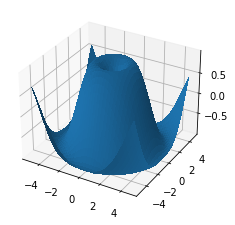